Association Rule Mining

In [16]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

dataset = pd.read_excel('Online Retail.xlsx')
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


https://github.com/AmitHasanShuvo/Machine-Learning-Projects/blob/master/Apriori%20Algorithm/Implementation%20of%20Apriori%20Algorithm.ipynb

In [17]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
# Checkign whether there is any null values of not

dataset.isnull().values.any()

True

In [19]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
# Stripping extra spaces in the description 
dataset['Description'] = dataset['Description'].str.strip() 
  
# Dropping the rows without any invoice number 
dataset.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str') 
  
# Dropping all transactions which were done on credit 
dataset = dataset[~dataset['InvoiceNo'].str.contains('C')] 

In [21]:
dataset.Country.unique() 

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [22]:
# Splitting the data according to the region of transaction
# Transactions done in Italy
basket_Italy = (dataset[dataset['Country'] =="Italy"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

basket_Italy

Description,12 EGG HOUSE PAINTED WOOD,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,...,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WRAP DOILEY DESIGN,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP RED APPLES,WRAP RED VINTAGE DOILY,YOU'RE CONFUSING ME METAL SIGN,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537022,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546875,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Defining the hot encoding function to make the data suitable  
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [24]:
# Applying one hot encoding 

basket_encoded = basket_Italy.applymap(hot_encode) 
basket_Italy = basket_encoded 
basket_Italy

Description,12 EGG HOUSE PAINTED WOOD,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,...,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WRAP DOILEY DESIGN,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP RED APPLES,WRAP RED VINTAGE DOILY,YOU'RE CONFUSING ME METAL SIGN,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537022,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546875,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
547914,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules 
# Building the model 
frq_items = apriori(basket_Italy, min_support = 0.1, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(LUNCH BAG WOODLAND),(LUNCH BAG CARS BLUE),0.105263,0.105263,0.105263,1.000000,9.500000,0.094183,inf,1.000000
31,(LUNCH BAG CARS BLUE),(LUNCH BAG WOODLAND),0.105263,0.105263,0.105263,1.000000,9.500000,0.094183,inf,1.000000
68,"(SET OF 20 KIDS COOKIE CUTTERS, RETROSPOT TEA ...",(GINGERBREAD MAN COOKIE CUTTER),0.105263,0.105263,0.105263,1.000000,9.500000,0.094183,inf,1.000000
73,(GINGERBREAD MAN COOKIE CUTTER),"(SET OF 20 KIDS COOKIE CUTTERS, RETROSPOT TEA ...",0.105263,0.105263,0.105263,1.000000,9.500000,0.094183,inf,1.000000
25,(GINGERBREAD MAN COOKIE CUTTER),(SET OF 20 KIDS COOKIE CUTTERS),0.105263,0.131579,0.105263,1.000000,7.600000,0.091413,inf,0.970588
...,...,...,...,...,...,...,...,...,...,...
20,(SET OF 3 CAKE TINS PANTRY DESIGN),(DOORMAT WELCOME TO OUR HOME),0.236842,0.157895,0.105263,0.444444,2.814815,0.067867,1.515789,0.844828
26,(SET OF 3 CAKE TINS PANTRY DESIGN),(JAM MAKING SET WITH JARS),0.236842,0.184211,0.105263,0.444444,2.412698,0.061634,1.468421,0.767241
43,(POSTAGE),(REGENCY CAKESTAND 3 TIER),0.447368,0.131579,0.105263,0.235294,1.788235,0.046399,1.135628,0.797619
37,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.447368,0.157895,0.105263,0.235294,1.490196,0.034626,1.101215,0.595238


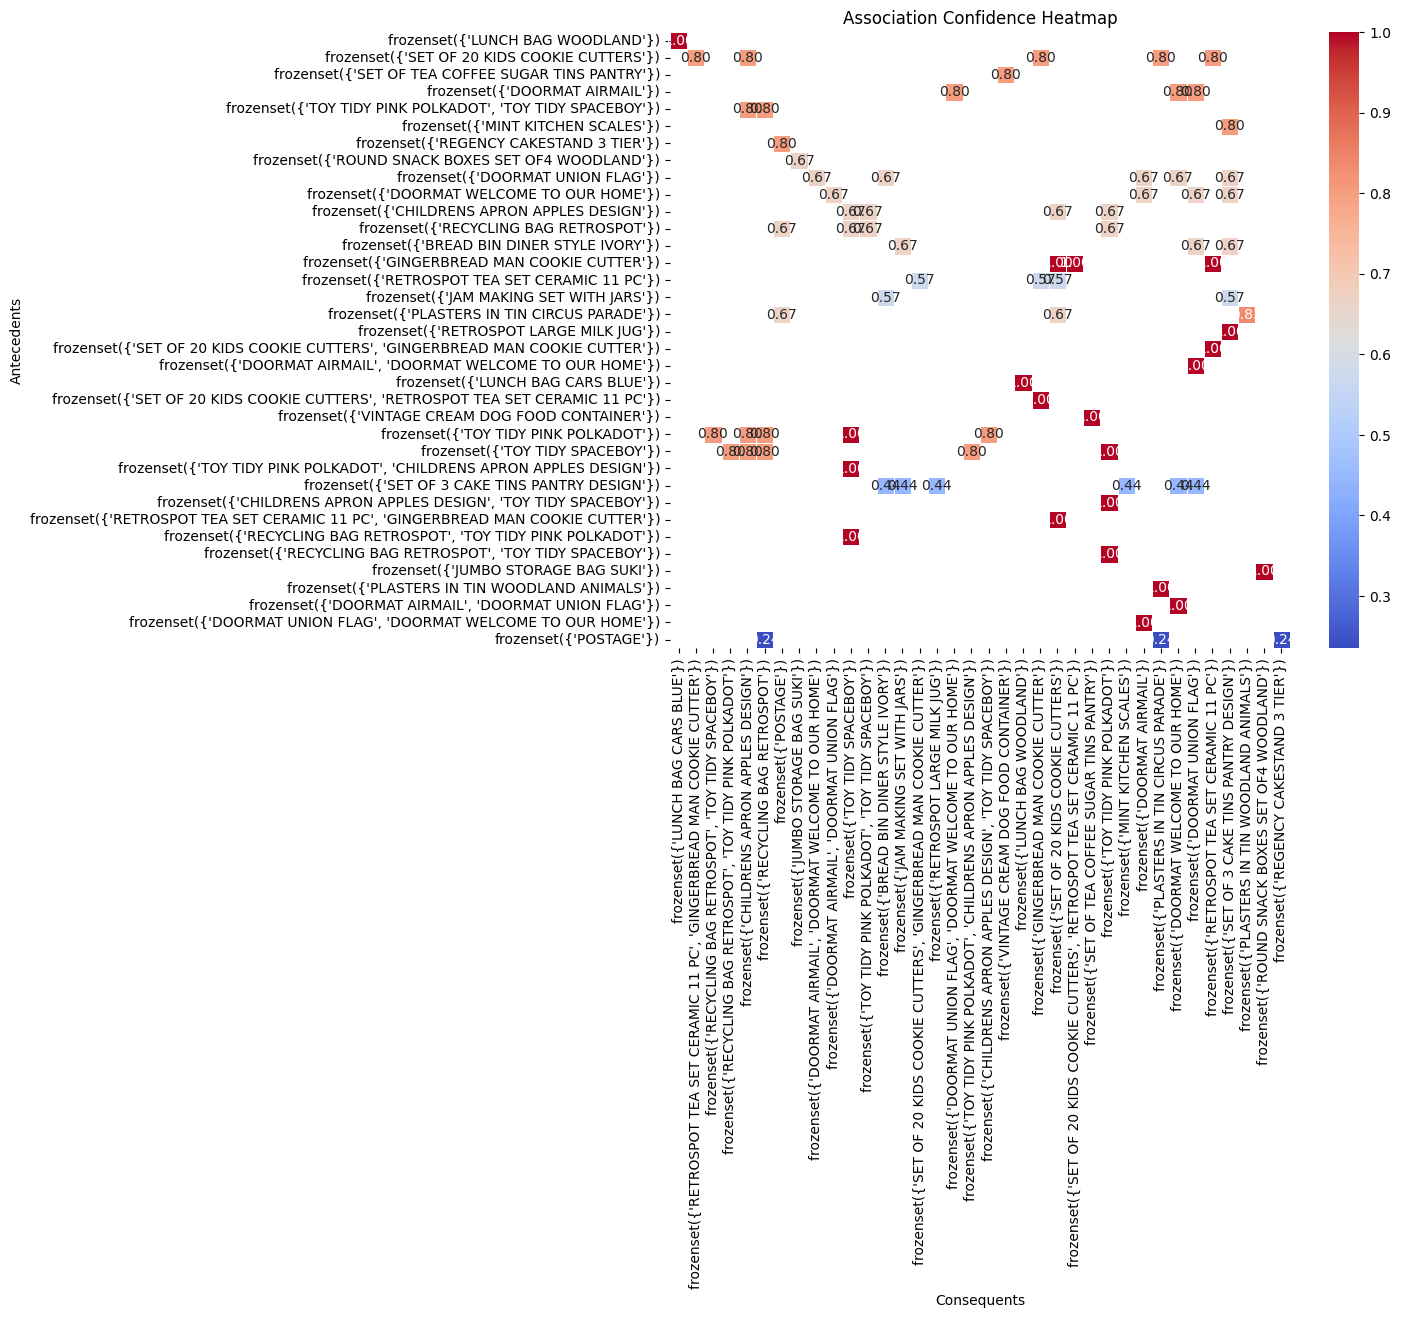

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


# Pivot the data
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

plt.title("Association Confidence Heatmap")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()
